<a href="https://colab.research.google.com/github/22922511/MachineLearningResource/blob/main/106Gradient%20Boosting%20Explained/106Gradient%20Boosting%20Explained.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd


In [101]:
np.random.seed(42)
x= np.random.rand(100, 1) - 0.5
y = 3*x[:, 0]**2 + 0.05 * np.random.randn(100)

In [102]:
df = pd.DataFrame()

df['ip'] = x.reshape(100)
df['op'] = y

In [103]:
df

,ip,op
0,-0.125460,0.051573
1,0.450714,0.594480
2,0.231994,0.166052
3,0.098658,-0.070178
4,-0.343981,0.343986
...,...,...
95,-0.006204,-0.040675
96,0.022733,-0.002305
97,-0.072459,0.032809
98,-0.474581,0.689516


Text(0.5, 1.0, 'X vs Y')

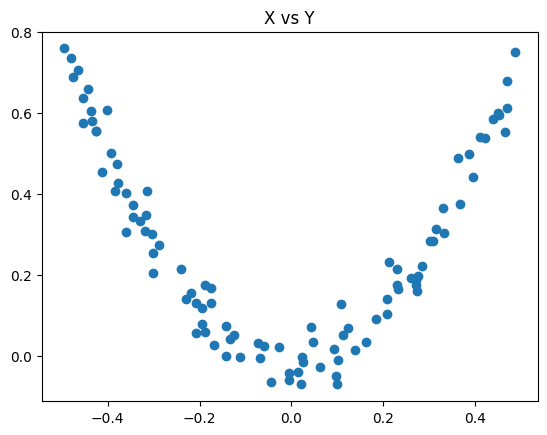

In [104]:
plt.scatter(df['ip'],df['op'])
plt.title('X vs Y')

In [105]:

df['pred1'] = df['op'].mean()

In [106]:
df

,ip,op,pred1
0,-0.125460,0.051573,0.265458
1,0.450714,0.594480,0.265458
2,0.231994,0.166052,0.265458
3,0.098658,-0.070178,0.265458
4,-0.343981,0.343986,0.265458
...,...,...,...
95,-0.006204,-0.040675,0.265458
96,0.022733,-0.002305,0.265458
97,-0.072459,0.032809,0.265458
98,-0.474581,0.689516,0.265458


In [107]:

df['res1'] = df['op'] - df['pred1']

In [108]:
df

,ip,op,pred1,res1
0,-0.125460,0.051573,0.265458,-0.213885
1,0.450714,0.594480,0.265458,0.329021
2,0.231994,0.166052,0.265458,-0.099407
3,0.098658,-0.070178,0.265458,-0.335636
4,-0.343981,0.343986,0.265458,0.078528
...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133
96,0.022733,-0.002305,0.265458,-0.267763
97,-0.072459,0.032809,0.265458,-0.232650
98,-0.474581,0.689516,0.265458,0.424057


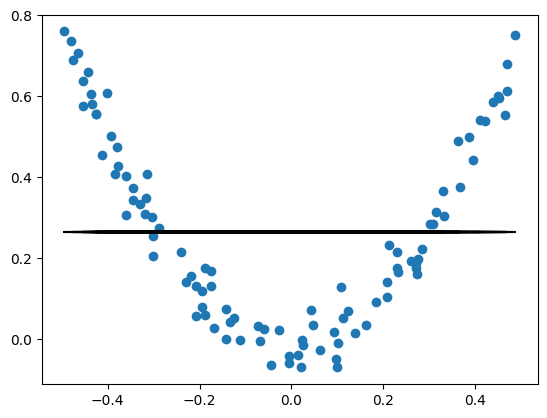

In [109]:

plt.scatter(df['ip'],df['op'])
plt.plot(df['ip'],df['pred1'],color='black')


In [110]:

from sklearn.tree import DecisionTreeRegressor

tree1 = DecisionTreeRegressor(max_leaf_nodes=8)

In [111]:
tree1.fit(df['ip'].values.reshape(100,1),df['res1'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

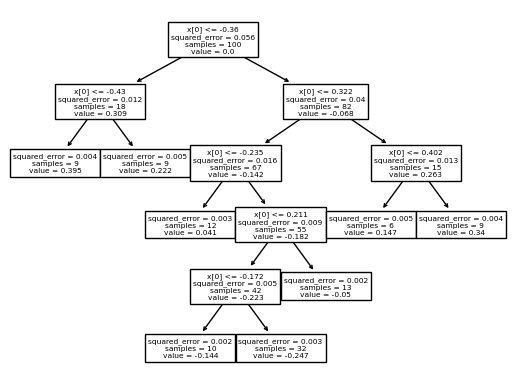

In [112]:
from sklearn.tree import plot_tree
plot_tree(tree1)
plt.show()


In [113]:
df['pre2']=	0.265458+tree1.predict(df['ip'].values.reshape(100,1))

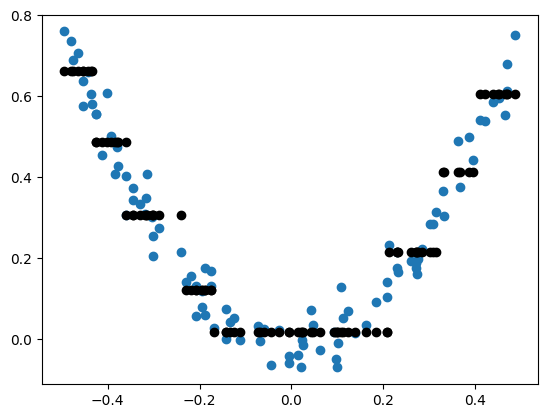

In [114]:

plt.scatter(df['ip'],df['op'])

plt.scatter(df['ip'],df['pre2'],color='black')

In [115]:
df['res2']=df['op']-df['pre2']

In [116]:
from sklearn.tree import DecisionTreeRegressor

tree2 = DecisionTreeRegressor(max_leaf_nodes=8)

In [117]:
tree2.fit(df['ip'].values.reshape(100,1),df['res2'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

In [119]:
df

,ip,op,pred1,res1,pre2,res2
0,-0.125460,0.051573,0.265458,-0.213885,0.018319,0.033254
1,0.450714,0.594480,0.265458,0.329021,0.605884,-0.011404
2,0.231994,0.166052,0.265458,-0.099407,0.215784,-0.049732
3,0.098658,-0.070178,0.265458,-0.335636,0.018319,-0.088497
4,-0.343981,0.343986,0.265458,0.078528,0.305964,0.038022
...,...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,0.018319,-0.058994
96,0.022733,-0.002305,0.265458,-0.267763,0.018319,-0.020624
97,-0.072459,0.032809,0.265458,-0.232650,0.018319,0.014489
98,-0.474581,0.689516,0.265458,0.424057,0.660912,0.028604


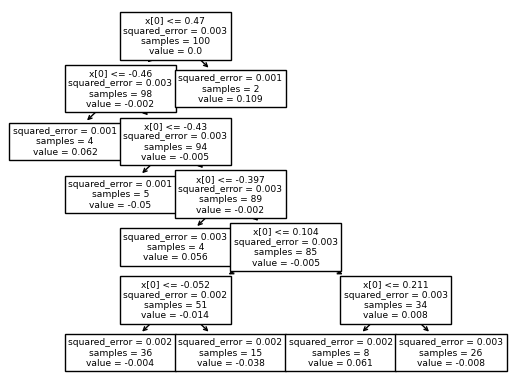

In [118]:
from sklearn.tree import plot_tree
plot_tree(tree2)
plt.show()

In [128]:
X_test = np.linspace(-0.5, 0.5, 500)


y_pred = 0.265458 + tree1.predict(X_test.reshape(500, 1))

In [129]:
 df['pre3']=0.265458+np.sum(sum(regressor.predict(X_test.reshape(-1, 1)) for regressor in [tree1,tree2]))


In [130]:
df

,ip,op,pred1,res1,pre2,res2,pre3
0,-0.125460,0.051573,0.265458,-0.213885,0.018319,0.033254,-5.733424
1,0.450714,0.594480,0.265458,0.329021,0.605884,-0.011404,-5.733424
2,0.231994,0.166052,0.265458,-0.099407,0.215784,-0.049732,-5.733424
3,0.098658,-0.070178,0.265458,-0.335636,0.018319,-0.088497,-5.733424
4,-0.343981,0.343986,0.265458,0.078528,0.305964,0.038022,-5.733424
...,...,...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,0.018319,-0.058994,-5.733424
96,0.022733,-0.002305,0.265458,-0.267763,0.018319,-0.020624,-5.733424
97,-0.072459,0.032809,0.265458,-0.232650,0.018319,0.014489,-5.733424
98,-0.474581,0.689516,0.265458,0.424057,0.660912,0.028604,-5.733424


Text(0.5, 1.0, 'X vs y')

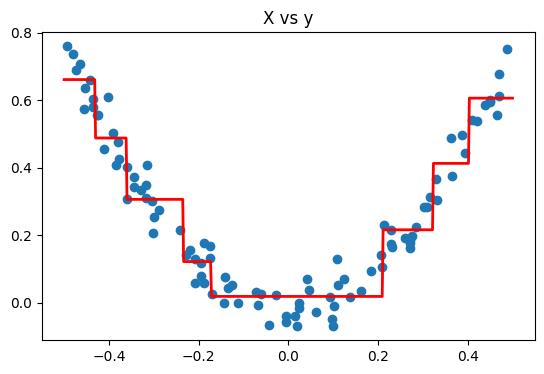

In [131]:

plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test, y_pred, linewidth=2,color='red')
plt.scatter(df['ip'],df['op'])
plt.title('X vs y')